## PUC Minas
### Pós-Graduação em Ciência de Dados e Big Data
#### Avaliação Final - Modelagem e Preparação de Dados para Aprendizado de Máquina

**Aluno(s):**

In [62]:
# Luciano Augusto Scherer Contri

### Base de Dados

**Descriçao de Atributos**

- age: idade
- workclass: classe de trabalho
- education: nível educacional
- education-num: anos de educação
- marital-status: estado civil
- occupation: profissão
- race: etnia
- sex: gênero
- capital-gain: ganho de capital
- capital-loss: perda de capital
- hours-per-week: horas de trabalho por semana
- native-country: país de origem

**Contexto dos Dados**

O dataset apresenta dados de um problema de classificação onde o objetivo é prever se a pessoa da observação ganha mais de 50k dólares por ano ou não.

## Atividades

**Dados**

In [63]:
# Carregue o dataset fornecido ('adult_final.csv')

In [64]:
import pandas as pd
        
adult_final = pd.read_csv('../../Datasets/adult_final.csv', sep = ',')
adult_final

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K


**1. Apresente o tipo das variáveis.**

In [65]:
adult_final.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

**2.Apresente de forma gráfica e numérica a análise exploratória das variáveis _education_ e _race_.**

<Axes: >

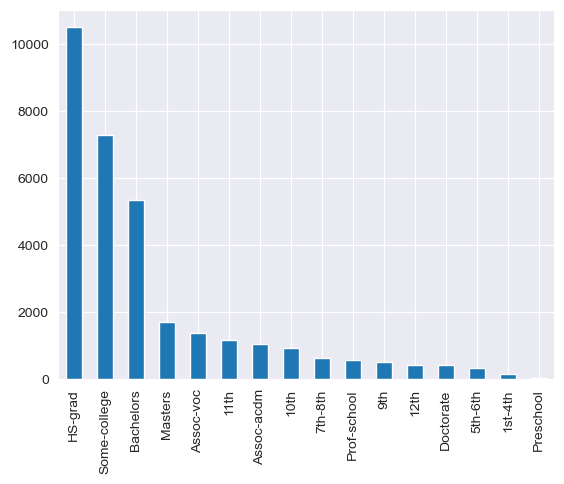

In [66]:
adult_final['education'].value_counts().plot(kind='bar')

In [67]:
# porcentagem 
adult_final['education'].value_counts(normalize=True) * 100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

<Axes: >

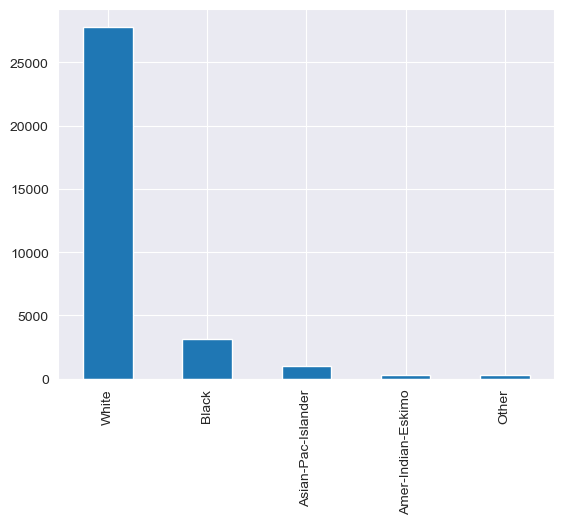

In [68]:
adult_final['race'].value_counts().plot(kind='bar')

In [69]:
# porcentagem
adult_final['race'].value_counts(normalize=True) * 100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

**3. Apresente as métricas estatísticas (média, moda, etc.) e histograma das variáveis _age_ e _hours-per-week_.**

In [70]:
# agregações
adult_final.agg({'age': ['mean', 'median', 'std', 'var', 'min', 'max'], 'hours-per-week': ['mean', 'median', 'std', 'var', 'min', 'max']})

,age,hours-per-week
mean,38.581647,40.437456
median,37.000000,40.000000
std,13.640433,12.347429
var,186.061400,152.458995
min,17.000000,1.000000
max,90.000000,99.000000


**4. Apresente 2 análises multivaridas entre variáveis a sua escolha.**

In [71]:
# média de idade por classe de trabalho
adult_final.groupby('workclass')[['capital-gain', 'age']].mean().sort_values(by='age')

,capital-gain,age
workclass,,
Never-worked,0.000000,20.571429
Private,889.217792,36.797585
State-gov,701.699538,39.436055
Local-gov,880.202580,41.751075
Federal-gov,833.232292,42.590625
Self-emp-not-inc,1886.061787,44.969697
Self-emp-inc,4875.693548,46.017025
Without-pay,487.857143,47.785714


In [72]:
# média de horas por semana por classe de trabalho
adult_final.groupby('workclass')['hours-per-week'].mean().sort_values()

workclass
Never-worked        28.428571
Without-pay         32.714286
State-gov           39.031587
Private             40.267096
Local-gov           40.982800
Federal-gov         41.379167
Self-emp-not-inc    44.421881
Self-emp-inc        48.818100
Name: hours-per-week, dtype: float64

In [73]:
# média de horas por semana por ocupação
adult_final.groupby('occupation')['hours-per-week'].mean().sort_values()

occupation
Priv-house-serv      32.885906
Other-service        34.701669
Adm-clerical         37.558355
Handlers-cleaners    37.947445
Tech-support         39.432112
Armed-Forces         40.666667
Machine-op-inspct    40.755744
Sales                40.781096
Craft-repair         42.304221
Prof-specialty       42.386715
Protective-serv      42.870570
Transport-moving     44.656230
Exec-managerial      44.987703
Farming-fishing      46.989940
Name: hours-per-week, dtype: float64

In [74]:
# workclass por média de idade
adult_final.groupby('workclass')['age'].mean().sort_values()

workclass
Never-worked        20.571429
Private             36.797585
State-gov           39.436055
Local-gov           41.751075
Federal-gov         42.590625
Self-emp-not-inc    44.969697
Self-emp-inc        46.017025
Without-pay         47.785714
Name: age, dtype: float64

In [75]:
# média de education-num por target
adult_final.groupby('workclass')['education-num'].mean().sort_values()

workclass
Never-worked         7.428571
Without-pay          9.071429
Private              9.879714
Self-emp-not-inc    10.226289
Federal-gov         10.973958
Local-gov           11.042045
Self-emp-inc        11.137097
State-gov           11.375963
Name: education-num, dtype: float64

**5. Apresente a soma de _NaN_ de cada coluna da base de dados.**

In [76]:
adult_final.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

**6. Trate os _NaN_ de todas as colunas como achar conveniente (explique). Em seguida, mostre que nenhuma coluna apresenta _NaN_ ao final do processo.**

Como as colunas são categoricas, não podemos substituir os valores faltantes pela média ou mediana, pois não faz sentido.   
podemos substituir os valores faltantes pela moda, ou seja, o valor mais frequente. 
Mas isso pode enviesar o modelo, pois a moda pode não ser a melhor escolha para substituir os valores faltantes.
Outra opção é usar o KNNImputer, que é um método de imputação que utiliza os k vizinhos mais próximos para preencher os valores faltantes.

### KNN

In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

# Carregar e preparar o DataFrame
df = adult_final.copy()
num_cols = ['education-num', 'age', 'capital-gain', 'hours-per-week']
cat_cols = ['workclass', 'occupation', 'native-country']

# hashmap para workclass em ordem crescente
workclass_map = {'Federal-gov': 1, 'Local-gov': 2, 'State-gov': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'Private': 6, 'Without-pay': 7, 'Never-worked': 8}

occupation_map = {'Prof-specialty': 1, 'Exec-managerial': 2, 'Protective-serv': 3, 'Tech-support': 4, 'Sales': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Adm-clerical': 8, 'Farming-fishing': 9, 'Machine-op-inspct': 10, 'Handlers-cleaners': 11, 'Other-service': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}

native_country_map = {'United-States': 1, 'Mexico': 2, 'Philippines': 3, 'Germany': 4, 'Puerto-Rico': 5, 'Canada': 6, 'El-Salvador': 7, 'India': 8, 'Cuba': 9, 'England': 10, 'Jamaica': 11, 'South': 12, 'China': 13, 'Italy': 14, 'Dominican-Republic': 15, 'Vietnam': 16, 'Guatemala': 17, 'Japan': 18, 'Poland': 19, 'Columbia': 20, 'Taiwan': 21, 'Haiti': 22, 'Iran': 23, 'Portugal': 24, 'Nicaragua': 25, 'Peru': 26, 'Greece': 27, 'Ecuador': 28, 'France': 29, 'Ireland': 30, 'Hong': 31, 'Cambodia': 32, 'Trinadad&Tobago': 33, 'Thailand': 34, 'Laos': 35, 'Yugoslavia': 36, 'Outlying-US(Guam-USVI-etc)': 37, 'Honduras': 38, 'Hungary': 39, 'Scotland': 40, 'Holand-Netherlands': 41}

# transformar workclass em ordem crescente
df['workclass'] = df['workclass'].map(workclass_map)
df['occupation'] = df['occupation'].map(occupation_map)
df['native-country'] = df['native-country'].map(native_country_map)

for i in cat_cols:
    # Separe os dados em conjunto de treinamento e teste
    train_df, test_df = train_test_split(df[num_cols + cat_cols].dropna(), test_size=0.2, random_state=42)
    
    # Treine um modelo de classificação (por exemplo, KNN) usando os dados de treinamento
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(train_df.drop(columns=[i]), train_df[i])  # 'workclass' é sua coluna alvo
    
    # Avalie a acurácia do modelo usando os dados de teste imputados
    y_true = test_df[i]  # 'workclass' é sua coluna alvo
    y_pred = knn_classifier.predict(test_df.drop(columns=[i]))  # 'workclass' é sua coluna alvo
    # Calcular balanced_accuracy_score
    
    accuracy = balanced_accuracy_score(y_true, y_pred)
    
    print(f"Acurácia do modelo imputado {i}: {accuracy:.3f}")

Acurácia do modelo imputado workclass: 0.195
Acurácia do modelo imputado occupation: 0.168
Acurácia do modelo imputado native-country: 0.032


Acurácia do modelo imputado workclass: 0.692
Acurácia do modelo imputado occupation: 0.227
Acurácia do modelo imputado native-country: 0.918

Tendo em vista que os dados faltantes são menores que 10% do total, podemos usar o KNNImputer para preencher os valores faltantes.

dtype('float64')

age                  0
workclass            0
education            0
education-num        0
marital-status       0
occupation        1843
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [131]:
# comparing the original and imputed values to see how many changed with a sum
(df[cat_cols] != adult_final[cat_cols]).sum()

workclass    32561
dtype: int64

In [132]:
df['workclass'].unique()

array([3. , 5. , 6. , 1. , 2. , 4. , 4.6, 5.6, 5.8, 4.2, 5.4, 4.8, 5.2,
       4.4, 3.8, 6.4, 7. , 3.4, 3.6, 8. , 6.2, 3.2])

Ta perfeito demais pra ser verdade, mas pode ser apenas porquê o dataset é pequeno. de qualquer forma, vamos imputar os valores faltantes no dataset original.

In [86]:
# imputar no dataset original   
df_imputed = adult_final.copy()
df_imputed[num_cols + cat_cols] = imputer.fit_transform(df[num_cols + cat_cols])
# Decodificar as colunas categóricas imputadas para os valores originais
for col in cat_cols:
    df_imputed[col] = encoders[col].inverse_transform(df_imputed[col].astype(int))


In [126]:
df.isna().sum()

age                  0
workclass            0
education            0
education-num        0
marital-status       0
occupation        1843
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [122]:
df[['workclass', 'occupation', 'native-country']].eq('Desconhecido').sum()


workclass         1835
occupation           0
native-country       0
dtype: int64

In [20]:
# Decodificar as colunas categóricas imputadas para os valores originais
for col in cat_cols:
    df_imputed[col] = encoders[col].inverse_transform(df_imputed[col].astype(int))

# Verificar se a decodificação foi bem-sucedida
df_imputed

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.030671,State-gov,Bachelors,1.134739,Never-married,Adm-clerical,White,Male,0.148453,0,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,White,Male,-0.145920,0,-2.222153,United-States,<=50K
2,-0.042642,Private,HS-grad,-0.420060,Divorced,Handlers-cleaners,White,Male,-0.145920,0,-0.035429,United-States,<=50K
3,1.057047,Private,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Black,Male,-0.145920,0,-0.035429,United-States,<=50K
4,-0.775768,Private,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Black,Female,-0.145920,0,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,White,Female,-0.145920,0,-0.197409,United-States,<=50K
32557,0.103983,Private,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,White,Male,-0.145920,0,-0.035429,United-States,>50K
32558,1.423610,Private,HS-grad,-0.420060,Widowed,Adm-clerical,White,Female,-0.145920,0,-0.035429,United-States,<=50K
32559,-1.215643,Private,HS-grad,-0.420060,Never-married,Adm-clerical,White,Male,-0.145920,0,-1.655225,United-States,<=50K


In [21]:
# tabela unica de nunique() onde index é o nome da coluna e as colunas são os valores únicos de cada dataframe
pd.concat([adult_final.nunique(), df_imputed.nunique()], axis=1, keys=['adult_final', 'df_imputed'])

,adult_final,df_imputed
age,73,73
workclass,8,9
education,16,16
education-num,16,16
marital-status,7,7
occupation,14,15
race,5,5
sex,2,2
capital-gain,119,119
capital-loss,92,92


Podemos ver que o número de valores únicos aumentou em 1 pois o encoder adicionou um valor para os valores faltantes. como demonstrado abaixo.

In [22]:
# adult_final.nunique() e df_imputed.nunique() para verificar se o número de valores únicos é o mesmo, lado a lado
print(adult_final['workclass'].unique()) 
print(adult_final['workclass'].nunique())
print(df_imputed['workclass'].unique())
print(df_imputed['workclass'].nunique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
8
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' 'nan'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
9


**7. Aplique _Ordinal Encoding_ em uma variável categórica ordinal.**

In [23]:
# ordinal encoding na coluna 'education'
from sklearn.preprocessing import OrdinalEncoder


df_imputed['education'] = OrdinalEncoder().fit_transform(df_imputed[['education']])
df_imputed['education']

0         9.0
1         9.0
2        11.0
3         1.0
4         9.0
         ... 
32556     7.0
32557    11.0
32558    11.0
32559    11.0
32560    11.0
Name: education, Length: 32561, dtype: float64

**8. Aplique _One Hot Encoding_ em uma variável categórica nominal.**

In [24]:
# categorias nominais: workclass, occupation e native-country

# one hot encoding na coluna 'workclass'
df_imputed = pd.get_dummies(df_imputed, columns=['workclass']) 

In [29]:
df_imputed['workclass_nan']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: workclass_nan, Length: 32561, dtype: uint8

**9. Aplique uma técnica de _oversampling_ (classe minoritária) e uma de _undersampling_ (classe majoritária). Apresente a mudança de volumetria (antes e depois). Se necessário, lembre-se de tratar as variáveis categóricas de forma adequada caso deseje usar um método mais robusto (SMOTE, por exemplo). Se for o caso, utilize PCA para visualizar os dados de forma bidimensional (antes e depois da amostragem).**

**10. Aplique _One Hot Encoding_ nas variáveis _race_ e _sex_. Junte ao resultado _TODAS_ as outras variáveis númericas (_age_, _education-num_, _capital-gain_, _capital-loss_ e _hours-per-week_). Utilize o dataset resultante no algoritmo t-SNE e reduza a dimensionalidade à 2 componentes (padrão do algoritmo). Plote o resultado diferenciando os pontos pela classe (atributo _target_).**